In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [2]:
def show(image):
    return plt.imshow(image, cmap="gray", norm=NoNorm())

In [3]:
base = """
5 2 6 2 3 2 1 2 3 1
1 3 6 7 9 2 4 4 7 1
1 5 8 8 10 17 21 19 9 4
4 18 34 56 17 25 38 17 7 2
1 14 22 43 68 91 62 23 16 7
6 12 21 21 39 87 76 34 4 2
9 24 54 73 88 95 69 16 12 5
3 5 6 40 34 42 6 4 2 5
4 9 16 14 32 51 13 6 6 2
4 2 5 3 3 3 5 3 3 3
"""

S_x = 0.25 * np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

S_y = S_x.T

In [4]:
base = np.array([[int(number) for number in line.split(" ")] for line in base.split("\n") if line != ""])

# Eingelesenes Bild

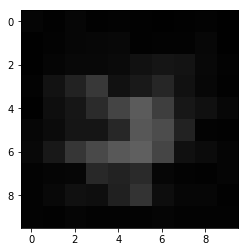

In [5]:
show(base)

# Faltungsoperator

In [6]:
def convolve(image, kernel):
    _image = np.pad(image, ((1, 1), (1, 1)), 'constant') # padd with zeros
    output_image = np.copy(image)
    for (x, y), value in np.ndenumerate(image):
        window = _image[x:x+3, y:y+3] # image[x-1:x+2, y-1:y+2] but x=x+1, y=y+1 because of pad
        output_image[x, y] = np.sum(np.multiply(window, kernel))
    return output_image

# 1) Mittelwertfilter

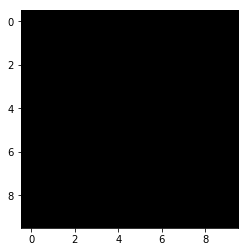

In [7]:
average_kernel = np.zeros((3,3)) + 1/9
avg = convolve(base, average_kernel)
show(avg)

# 2)

## Grauwertspeizung
(Quelle: http://home.in.tum.de/~perzylo/Proseminar/Punktoperatoren.pdf)

In [8]:
def scale(image, g_1=None, g_2=None, G=255):
    if g_1 is None:
        g_1 = np.min(image)
    if g_2 is None:
        g_2 = np.max(image)

    output = np.copy(image)
    for (x, y), value in np.ndenumerate(image):
        if value < g_1:
            output[x, y] = 0
        elif value > g_2:
            output[x, y] = G - 1
        else:
            output[x, y] = (G - 1)*(value - g_1)/(g_2 - g_1)
    return output

In [9]:
base_scaled = scale(base)

## Eingabebild mit Grauwertspreizung

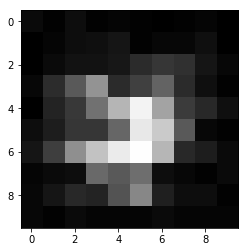

In [10]:
show(base_scaled)

## Sobel-Operator in x-Richtung

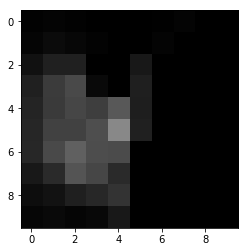

In [11]:
x = convolve(base_scaled, S_x)
show(x)

## Sobel-Operator in y-Richtung

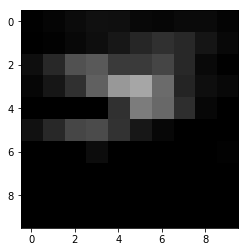

In [12]:
y = convolve(base_scaled, S_y)
show(y)

# 3) und 4) Ergebnis

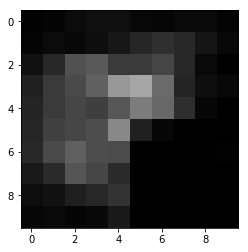

In [13]:
g = np.maximum(x, y)
show(g)

In [14]:
#import cv2
#base = cv2.imread("input.ppm", 0)
#plt.imshow(base, cmap="gray", norm=NoNorm())